# Micro-Credit Defaulter 
### A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. Microfinance services (MFS) becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income.

### Project is for Telecom  Industry

### We will build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of issuance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

##### Before we start analzsing the data,  we have to import some important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")

pandas_profiling.ProfileReport(pd.read_csv("MFI_Data_file.csv"))

<b><font color=red>The pandas_profiling library in Python include a method named as ProfileReport() which generate a basic report on the input DataFrame
The report consist of the following:
##### Type inference: detect the types of columns in a dataframe. 
##### Essentials: type, unique values, missing values
##### Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
##### Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
##### Most frequent values
##### Histogram
##### Correlations highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices
##### Missing values matrix, count, heatmap and dendrogram of missing values
##### Text analysis learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.
##### File and Image analysis extract file sizes, creation dates and dime

##### Total attributes is 37,   Numerical=32, Categorical=4, Boolean=1
##### No Missing values is present
##### High correlation
##### We have only 1 year, 1 telecom circle 


In [3]:
df = pd.read_csv("MFI_Data_file.csv")
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [4]:
df.tail()

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

             pdate  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[5 rows x 37 columns]

## EDA 

In [5]:
df.drop("Unnamed: 0",axis=1, inplace=True)

##### Removing unwanted column, it is just an index only

In [6]:
df.shape

(209593, 36)

In [7]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [9]:
total_records = df.shape[0]
Non_defaulter = df[df["label"] == 1].shape[0]
Defaulter = df[df["label"] == 0].shape[0]
Non_defaulter_percent = (Non_defaulter/total_records)*100
Defaulter_percent = (Defaulter/total_records)*100

print("Total customers: {}".format(total_records))
print("Non defaulter customer: {}".format(Non_defaulter))
print("Defaulter customer : {}".format(Defaulter))
print("Non Defaulter Customer percentage : {}".format(Non_defaulter_percent))
print("Deafulter Customer : {}".format(Defaulter_percent))

Total customers: 209593
Non defaulter customer: 183431
Defaulter customer : 26162
Non Defaulter Customer percentage : 87.5177129007171
Deafulter Customer : 12.482287099282896


<b><font color=red>From above we can see the values of Defaulter & Non-Defaulter 
 ##### 87.5 %  customers are Non Defaulter & that 12.5 customers are Defaulter    

In [10]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

<b><font color=red>We can see above the unique values in all attributes
##### pcircle having only 1 unique value & msisdn having max unique values

In [11]:
for column in df.columns:
    
    print(f"========Column: {column}========")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Max: {df[column].max()}")
    print(f"Min: {df[column].min()}")

========Column: label========
Number of unique values: 2
Max: 1
Min: 0
========Column: msisdn========
Number of unique values: 186243
Max: 99998I95206
Min: 00004I82738
========Column: aon========
Number of unique values: 4507
Max: 999860.755167902
Min: -48.0
========Column: daily_decr30========
Number of unique values: 147026
Max: 265926.0
Min: -93.0126666666667
========Column: daily_decr90========
Number of unique values: 158670
Max: 320630.0
Min: -93.0126666666667
========Column: rental30========
Number of unique values: 132148
Max: 198926.11
Min: -23737.14
========Column: rental90========
Number of unique values: 141033
Max: 200148.11
Min: -24720.58
========Column: last_rech_date_ma========
Number of unique values: 1186
Max: 998650.3777327021
Min: -29.0
========Column: last_rech_date_da========
Number of unique values: 1174
Max: 999171.809409745
Min: -29.0
========Column: last_rech_amt_ma========
Number of unique values: 70
Max: 55000
Min: 0
========Column: cnt_ma_rech30========
Num

<b><font color=red>From above we can see the max & min of unique values for all attributes

In [12]:
x = df.drop(["pcircle"],axis=1)
y = df["pcircle"]

for attr in x.columns:
    print("\n",attr)
    print(x[attr].value_counts())


 label
1    183431
0     26162
Name: label, dtype: int64

 msisdn
47819I90840    7
04581I85330    7
55809I89238    6
87592I84456    6
60744I91197    6
              ..
69734I84456    1
14537I89230    1
59926I70370    1
44524I76694    1
83988I88690    1
Name: msisdn, Length: 186243, dtype: int64

 aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64

 daily_decr30
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 147026, dtype: int64

 daily_decr90
0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.

<b><font color=red>In this we can see the values of each unique values or How many times of repetition of unique values in all attributes.

In [13]:
df.describe().T

count          mean           std           min  \
label                 209593.0      0.875177      0.330519      0.000000   
aon                   209593.0   8112.343445  75696.082531    -48.000000   
daily_decr30          209593.0   5381.402289   9220.623400    -93.012667   
daily_decr90          209593.0   6082.515068  10918.812767    -93.012667   
rental30              209593.0   2692.581910   4308.586781 -23737.140000   
rental90              209593.0   3483.406534   5770.461279 -24720.580000   
last_rech_date_ma     209593.0   3755.847800  53905.892230    -29.000000   
last_rech_date_da     209593.0   3712.202921  53374.833430    -29.000000   
last_rech_amt_ma      209593.0   2064.452797   2370.786034      0.000000   
cnt_ma_rech30         209593.0      3.978057      4.256090      0.000000   
fr_ma_rech30          209593.0   3737.355121  53643.625172      0.000000   
sumamnt_ma_rech30     209593.0   7704.501157  10139.621714      0.000000   
medianamnt_ma_rech30  209593.0   1812.817952   2070.864620      0.000000   
medianmarechprebal30  209593.0   3851.927942  54006.374433   -200.000000   
cnt_ma_rech90         209593.0      6.315430      7.193470      0.000000   
fr_ma_rech90          209593.0      7.716780     12.590251      0.000000   
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882      0.000000   
medianamnt_ma_rech90  209593.0   1864.595821   2081.680664      0.000000   
medianmarechprebal90  209593.0     92.025541    369.215658   -200.000000   
cnt_da_rech30         209593.0    262.578110   4183.897978      0.000000   
fr_da_rech30          209593.0   3749.494447  53885.414979      0.000000   
cnt_da_rech90         209593.0      0.041495      0.397556      0.000000   
fr_da_rech90          209593.0      0.045712      0.951386      0.000000   
cnt_loans30           209593.0      2.758981      2.554502      0.000000   
amnt_loans30          209593.0     17.952021     17.379741      0.000000   
maxamnt_loans30       209593.0    274.658747   4245.264648      0.000000   
medianamnt_loans30    209593.0      0.054029      0.218039      0.000000   
cnt_loans90           209593.0     18.520919    224.797423      0.000000   
amnt_loans90          209593.0     23.645398     26.469861      0.000000   
maxamnt_loans90       209593.0      6.703134      2.103864      0.000000   
medianamnt_loans90    209593.0      0.046077      0.200692      0.000000   
payback30             209593.0      3.398826      8.813729      0.000000   
payback90             209593.0      4.321485     10.308108      0.000000   

                           25%          50%       75%            max  
label                    1.000     1.000000      1.00       1.000000  
aon                    246.000   527.000000    982.00  999860.755168  
daily_decr30            42.440  1469.175667   7244.00  265926.000000  
daily_decr90            42.692  1500.000000   7802.79  320630.000000  
rental30               280.420  1083.570000   3356.94  198926.110000  
rental90               300.260  1334.000000   4201.79  200148.110000  
last_rech_date_ma        1.000     3.000000      7.00  998650.377733  
last_rech_date_da        0.000     0.000000      0.00  999171.809410  
last_rech_amt_ma       770.000  1539.000000   2309.00   55000.000000  
cnt_ma_rech30            1.000     3.000000      5.00     203.000000  
fr_ma_rech30             0.000     2.000000      6.00  999606.368132  
sumamnt_ma_rech30     1540.000  4628.000000  10010.00  810096.000000  
medianamnt_ma_rech30   770.000  1539.000000   1924.00   55000.000000  
medianmarechprebal30    11.000    33.900000     83.00  999479.419319  
cnt_ma_rech90            2.000     4.000000      8.00     336.000000  
fr_ma_rech90             0.000     2.000000      8.00      88.000000  
sumamnt_ma_rech90     2317.000  7226.000000  16000.00  953036.000000  
medianamnt_ma_rech90   773.000  1539.000000   1924.00   55000.000000  
medianmarechprebal90    14.600    36.000000     79.31   41456.500000  
cnt_da_rech30       

In [14]:
df.isnull().sum().to_frame()

0
label                 0
msisdn                0
aon                   0
daily_decr30          0
daily_decr90          0
rental30              0
rental90              0
last_rech_date_ma     0
last_rech_date_da     0
last_rech_amt_ma      0
cnt_ma_rech30         0
fr_ma_rech30          0
sumamnt_ma_rech30     0
medianamnt_ma_rech30  0
medianmarechprebal30  0
cnt_ma_rech90         0
fr_ma_rech90          0
sumamnt_ma_rech90     0
medianamnt_ma_rech90  0
medianmarechprebal90  0
cnt_da_rech30         0
fr_da_rech30          0
cnt_da_rech90         0
fr_da_rech90          0
cnt_loans30           0
amnt_loans30          0
maxamnt_loans30       0
medianamnt_loans30    0
cnt_loans90           0
amnt_loans90          0
maxamnt_loans90       0
medianamnt_loans90    0
payback30             0
payback90             0
pcircle               0
pdate                 0

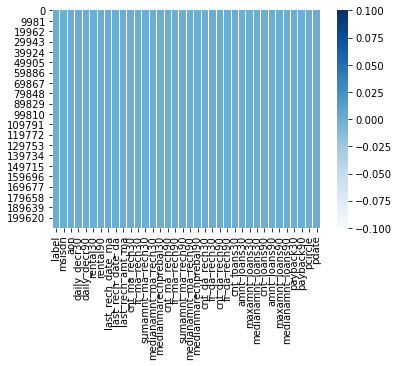

In [15]:
sns.heatmap(df.isnull(),xticklabels=True, cmap="Blues")

<b><font color=red>heatmap shows, there is not any null value present in data.

In [16]:
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [17]:
count_balance_response_pct = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [18]:
bal = pd.DataFrame(df['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

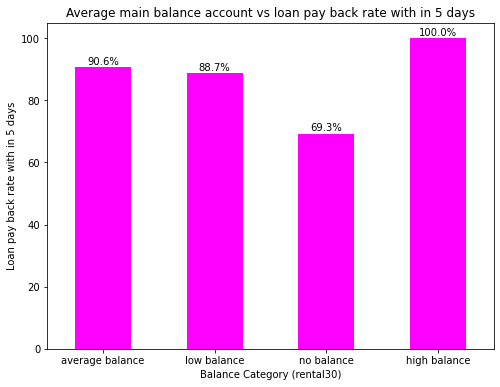

In [19]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('magenta'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2,rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black') 

<b><font color=red> We have created a balance group from which we can understand/ or we have an idea about the customers, whos is Non Defaulter & Defaulter 

##### From above graph we can differentiate the customers with  main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.
    
##### Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in stipulated 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In [20]:
lst = [df]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [21]:
count_fre_response_pct = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [22]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

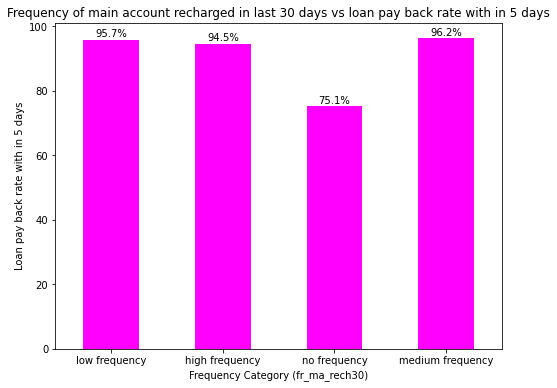

In [23]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('magenta'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

<b><font color=red> We have created a column named as frequency group, in this we have 4 categories
    
#####  Customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.

##### Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.



In [24]:
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [25]:
count_loan_response_pct = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [26]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

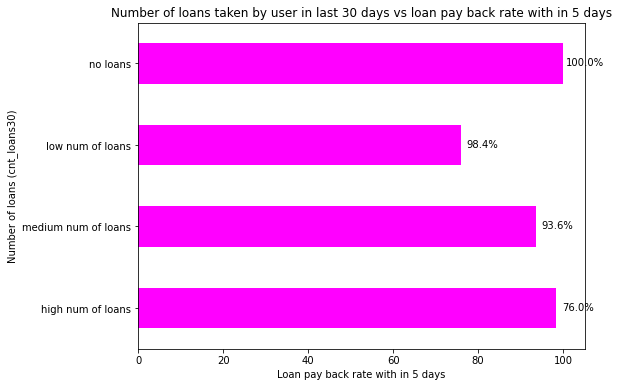

In [27]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('magenta'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

<b><font color=red>We have created a column named as frequency group, in this we have 4 categories
    
##### customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
    
##### remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.


In [28]:
lst = [df]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [29]:
count_loanamnt_response_pct = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()


In [30]:
fre1 = pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

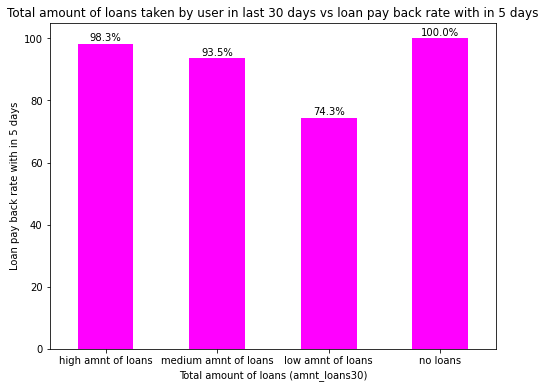

In [31]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('magenta'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

<b><font color=red>We have created Loan  amount frequency column

##### In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.
    
##### Remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.
    

##### As 'msisdn', 'pcircle', 'pdate' features are not having much importance, we can ignore them. And also removing the extra columns created for the EDA part.


In [32]:
df.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

In [33]:
import plotly.offline as po
import plotly.graph_objs as go


plot_by_loans_labels = df["label"].value_counts().keys().tolist()
plot_by_loans_values = df["label"].value_counts().values.tolist()

plot_data= [go.Pie(labels = plot_by_loans_labels,
                   values = plot_by_loans_values,
                   marker = dict(colors = ["Teal","Grey"],
                                line = dict(color ="white",
                                           width =1.5)),
                   rotation = 90,
                   hoverinfo = "label+value+text",
                   hole = .6 )]

plot_layout = go.Layout(dict(title = "Loan Defaulter",
                           plot_bgcolor = "rgb(243,243,243)",
                           paper_bgcolor = "rgb(243,243,243)",))

fig= go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

### Check for the correlation  with the dependent variable label

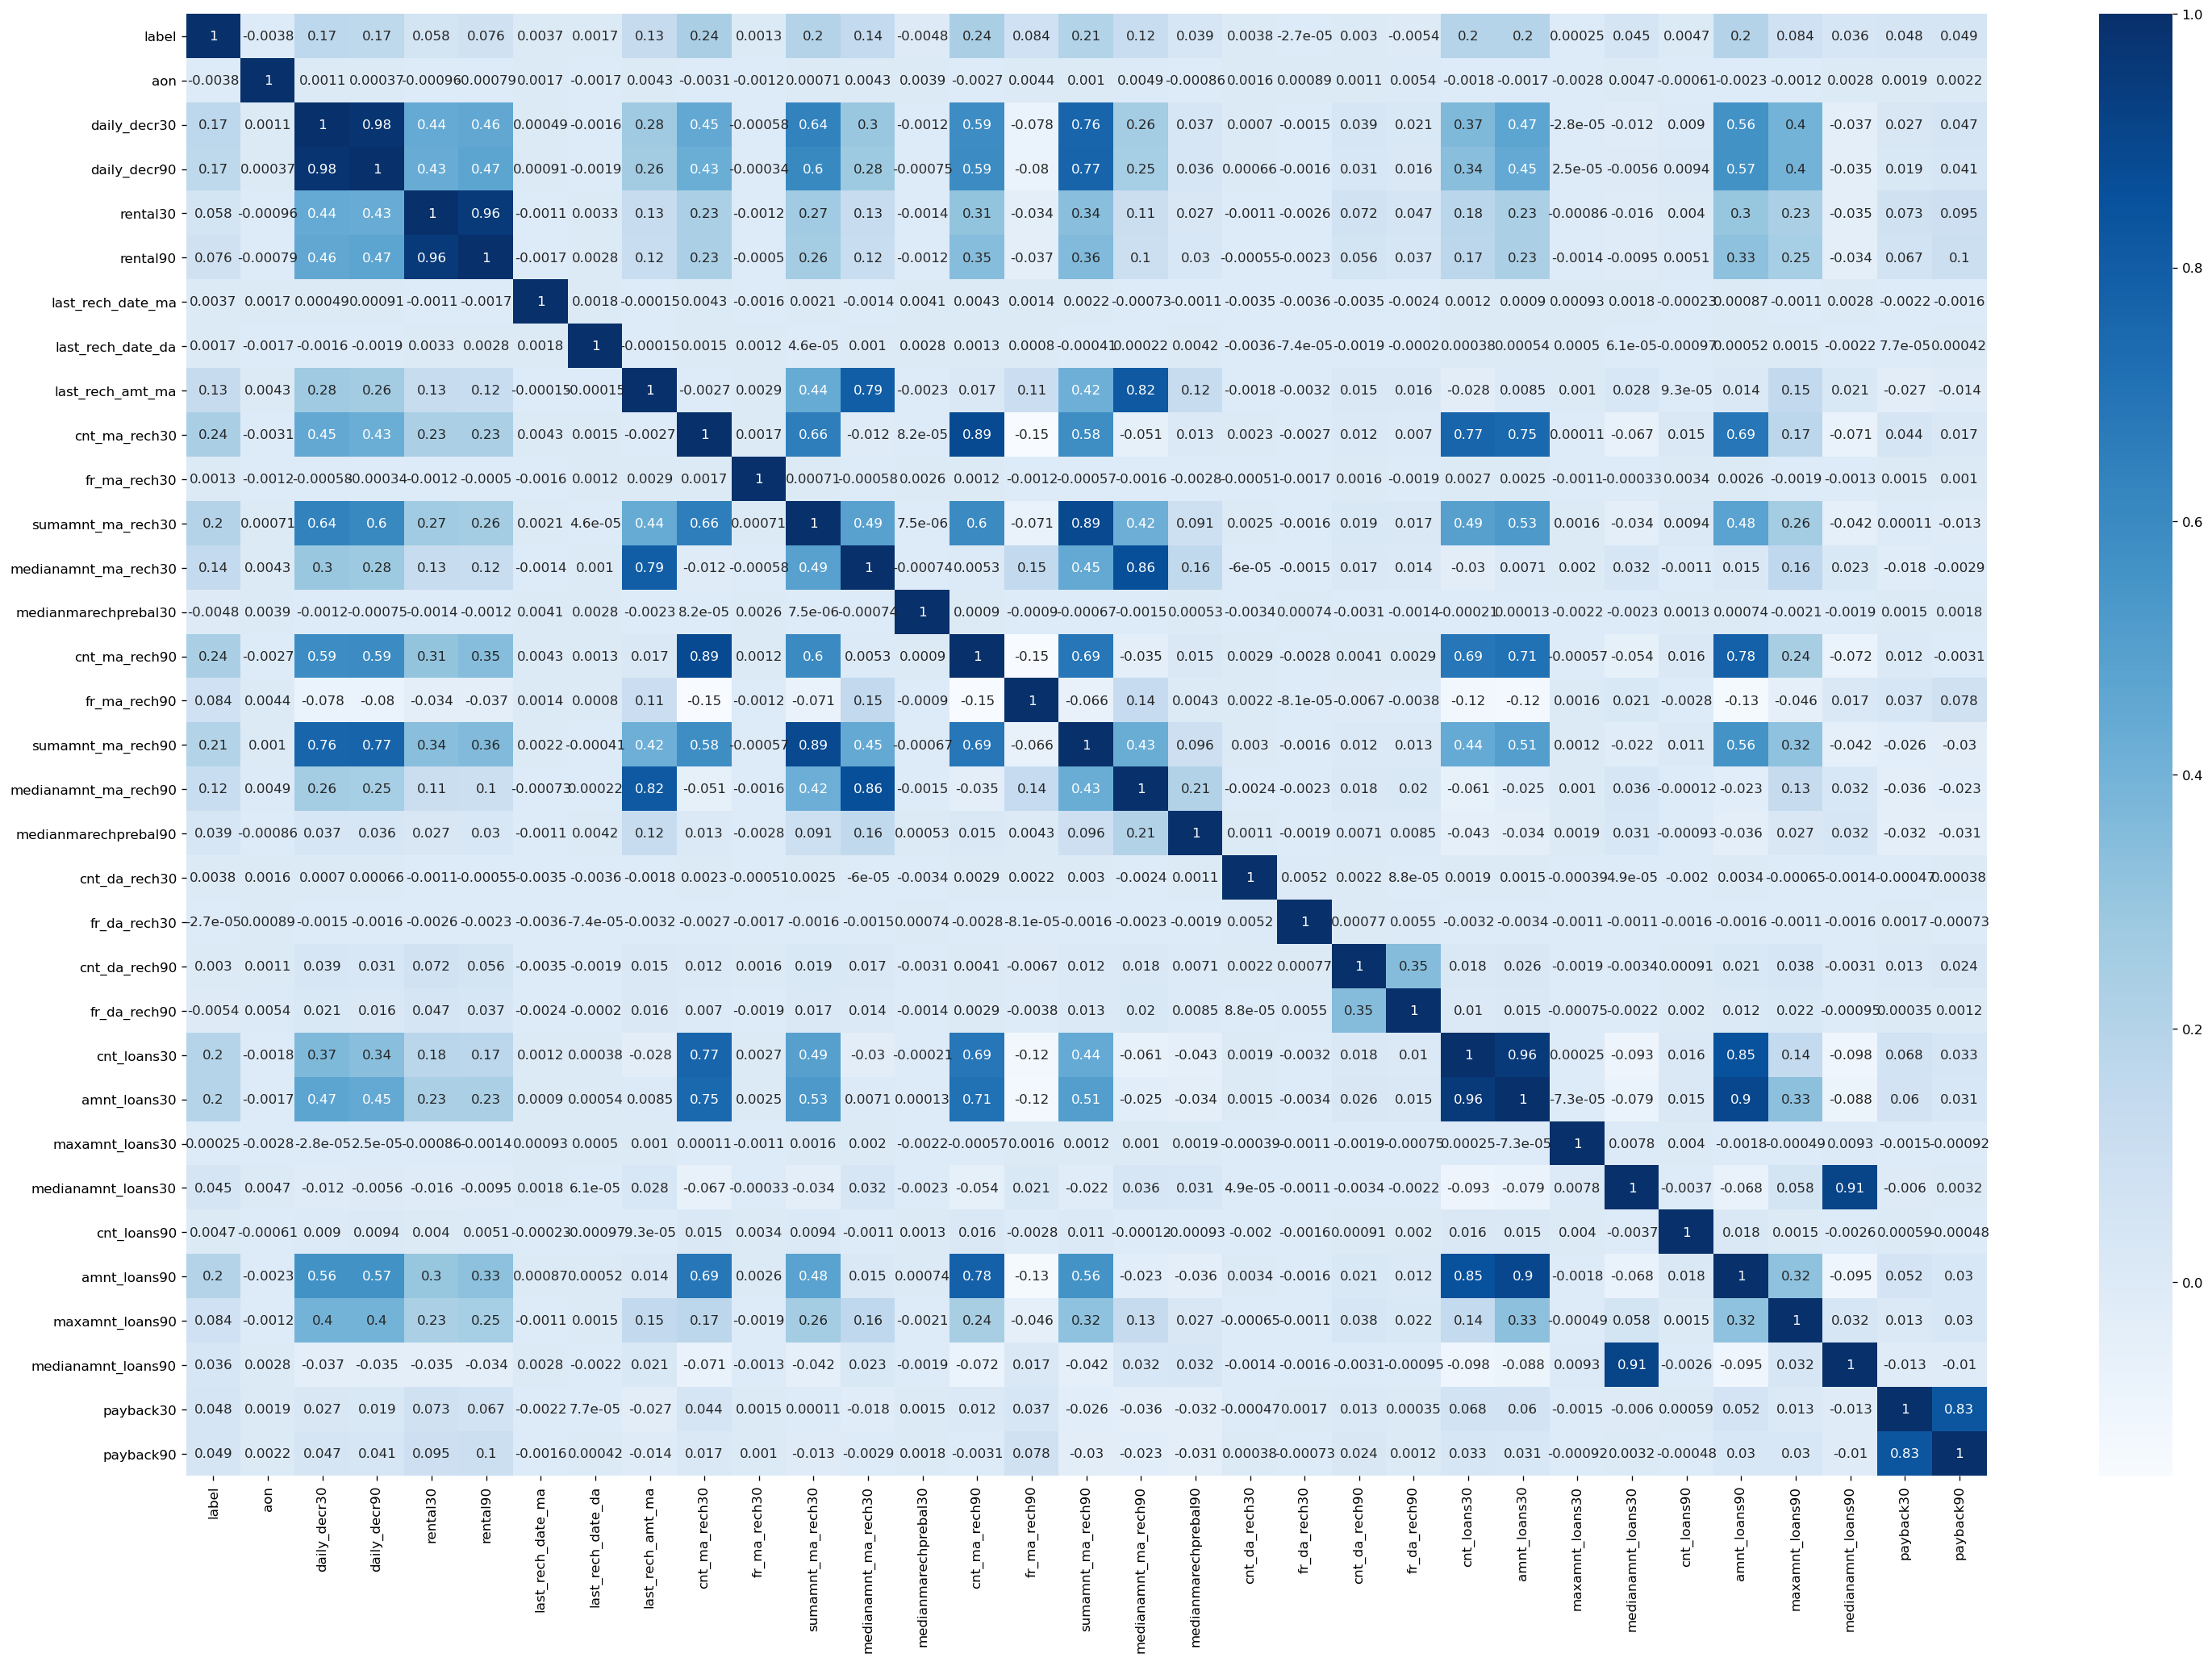

In [34]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,20),dpi=120)
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="Blues")

[Text(1, 0.5, 'cnt_ma_rech30'),
 Text(1, 1.5, 'cnt_ma_rech90'),
 Text(1, 2.5, 'amnt_loans90'),
 Text(1, 3.5, 'cnt_loans30'),
 Text(1, 4.5, 'amnt_loans30'),
 Text(1, 5.5, 'daily_decr30'),
 Text(1, 6.5, 'daily_decr90'),
 Text(1, 7.5, 'sumamnt_ma_rech30'),
 Text(1, 8.5, 'sumamnt_ma_rech90'),
 Text(1, 9.5, 'maxamnt_loans90'),
 Text(1, 10.5, 'rental30'),
 Text(1, 11.5, 'rental90'),
 Text(1, 12.5, 'last_rech_amt_ma'),
 Text(1, 13.5, 'medianamnt_ma_rech30'),
 Text(1, 14.5, 'medianamnt_ma_rech90'),
 Text(1, 15.5, 'medianamnt_loans30'),
 Text(1, 16.5, 'medianamnt_loans90'),
 Text(1, 17.5, 'payback30'),
 Text(1, 18.5, 'payback90'),
 Text(1, 19.5, 'label'),
 Text(1, 20.5, 'fr_ma_rech90'),
 Text(1, 21.5, 'cnt_da_rech90'),
 Text(1, 22.5, 'fr_da_rech90'),
 Text(1, 23.5, 'medianmarechprebal90'),
 Text(1, 24.5, 'cnt_loans90'),
 Text(1, 25.5, 'maxamnt_loans30'),
 Text(1, 26.5, 'fr_da_rech30'),
 Text(1, 27.5, 'cnt_da_rech30'),
 Text(1, 28.5, 'medianmarechprebal30'),
 Text(1, 29.5, 'fr_ma_rech30'),
 Text

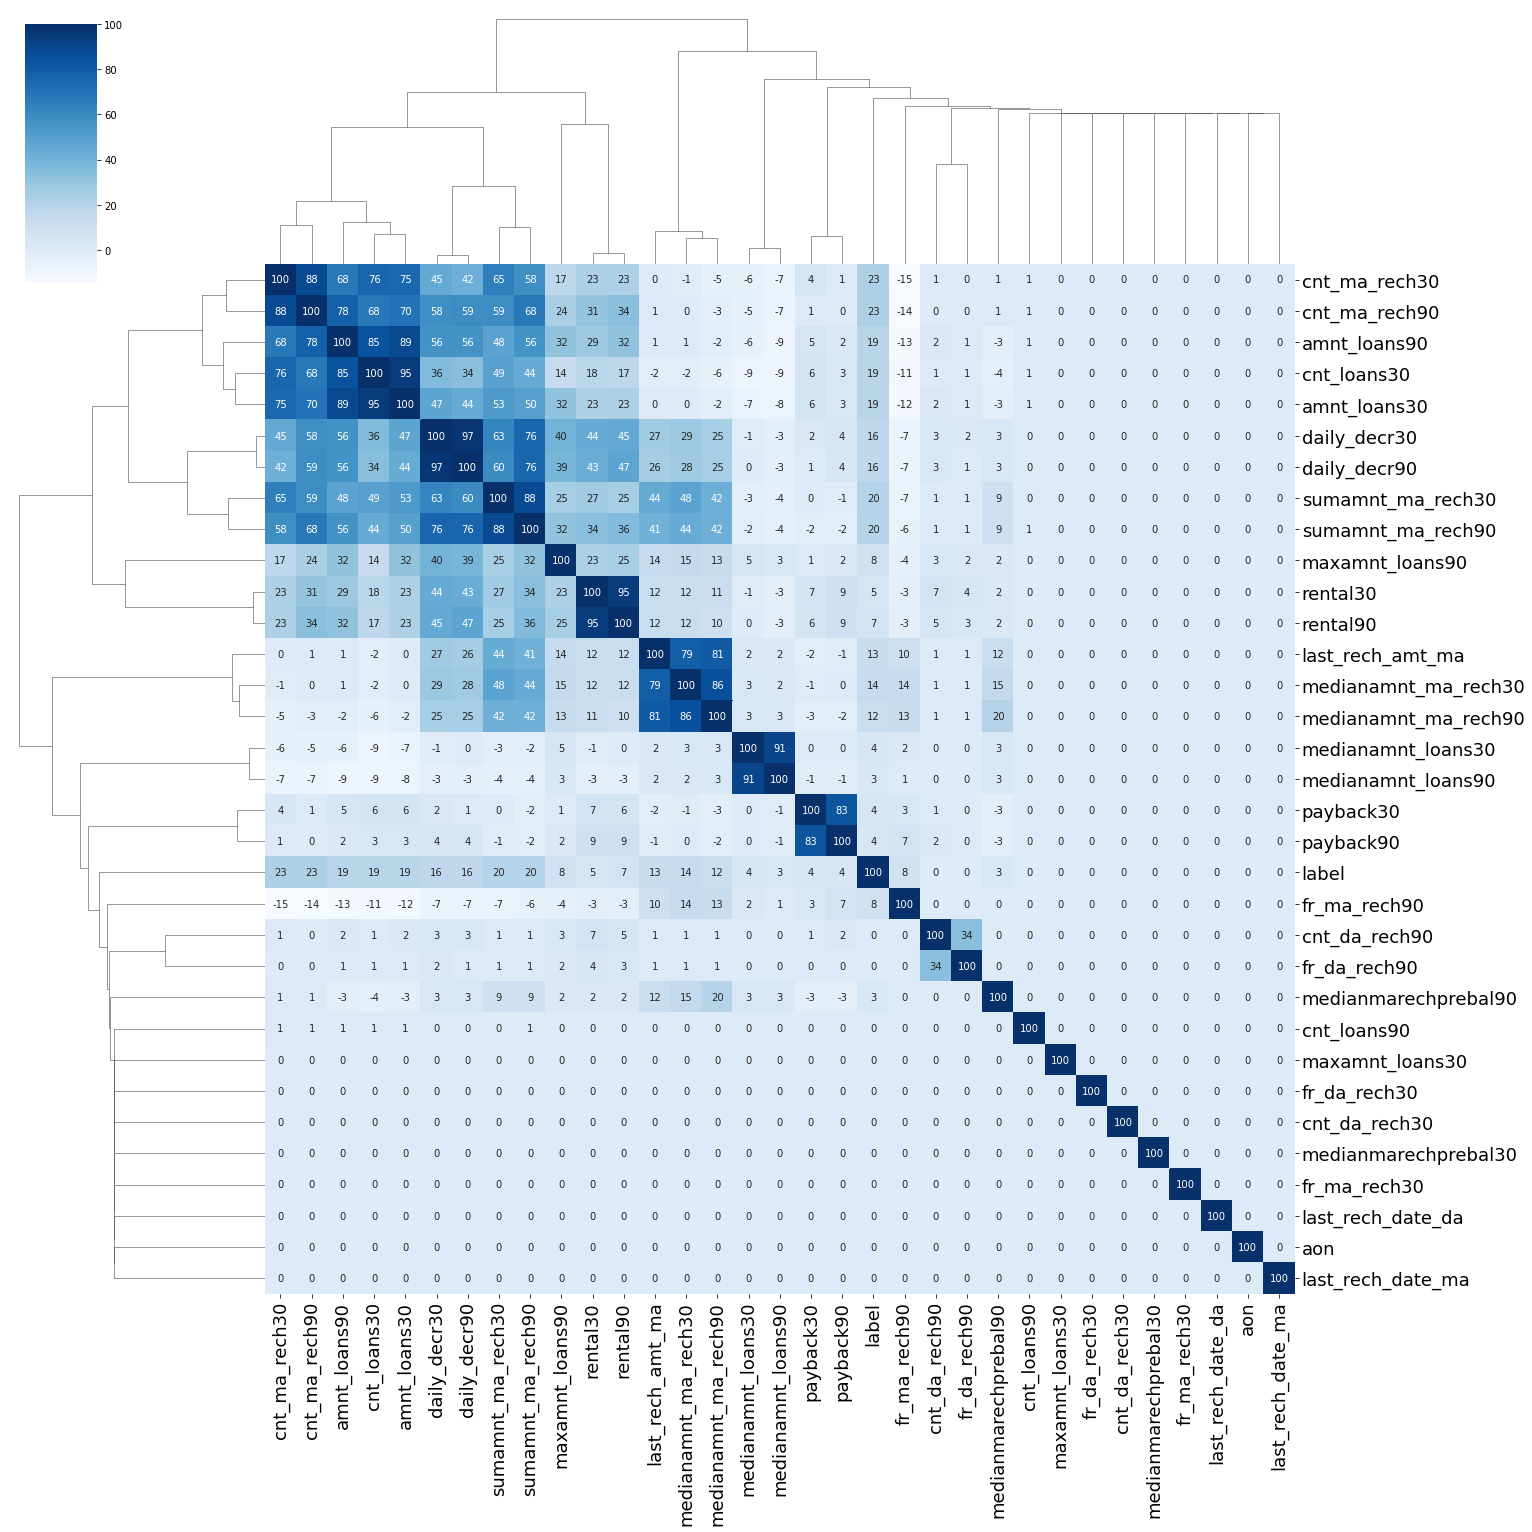

In [35]:
corr = df.corr().mul(100).astype(int)
g = sns.clustermap(data=corr, annot=True, fmt="d",cmap="Blues", figsize=(20,20))
cmap=sns.diverging_palette(h_neg=1500,h_pos=1000, as_cmap=True)

g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=18)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=18)



<b><font color=red>cnt_loans90, amnt_loans90, cnt_ma_rech30, cnt_ma_rech90, daily_decr30, daily_decr90,rental30
rental90, medianamnt_ma_rech30, medianamnt_ma_rech90, payback90, payback30, these columns are high correlated


In [36]:
df.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30',
             'medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

<b><font color=red> above columns are not correlated, so we gonna drop it

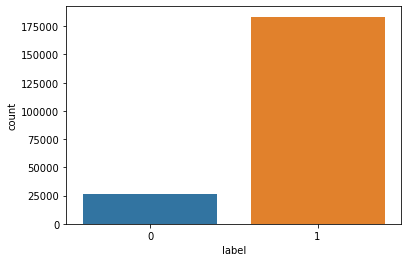

In [37]:
sns.countplot(df["label"])

<b><font color=red> It will show us the coutplot between label & all the attributes. But unfortunately it will take really long time, so we will skip this part.
##### def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ab = sns.countplot(x=df[col], hue=hue, data=df)
hue = df["label"]
dataplot =df.drop("label",1)
plot_data(hue,dataplot)

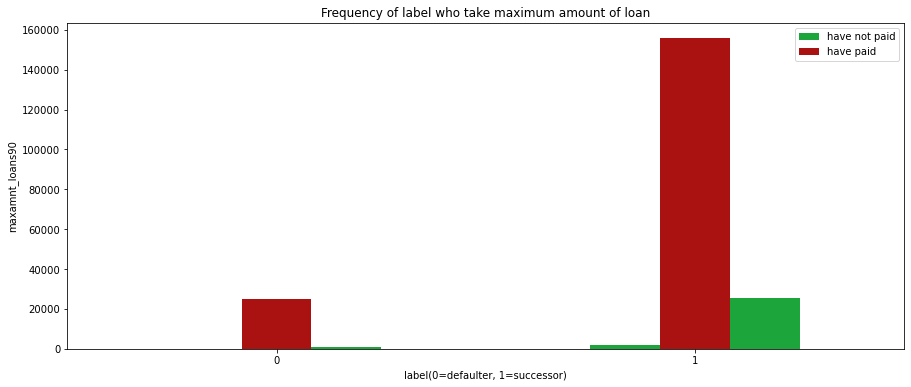

In [38]:
pd.crosstab(df.label,df.maxamnt_loans90).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Frequency of label who take maximum amount of loan')
plt.xlabel('label(0=defaulter, 1=successor)')
plt.xticks(rotation=0)
plt.legend(['have not paid', 'have paid'])
plt.ylabel('maxamnt_loans90')
plt.show()


<b><font color=red>Max amount of loan taken by the user in last 90 days and who have paid is the Non-Defaulter which range is high as compare to the person who have not paid called as Defaulter

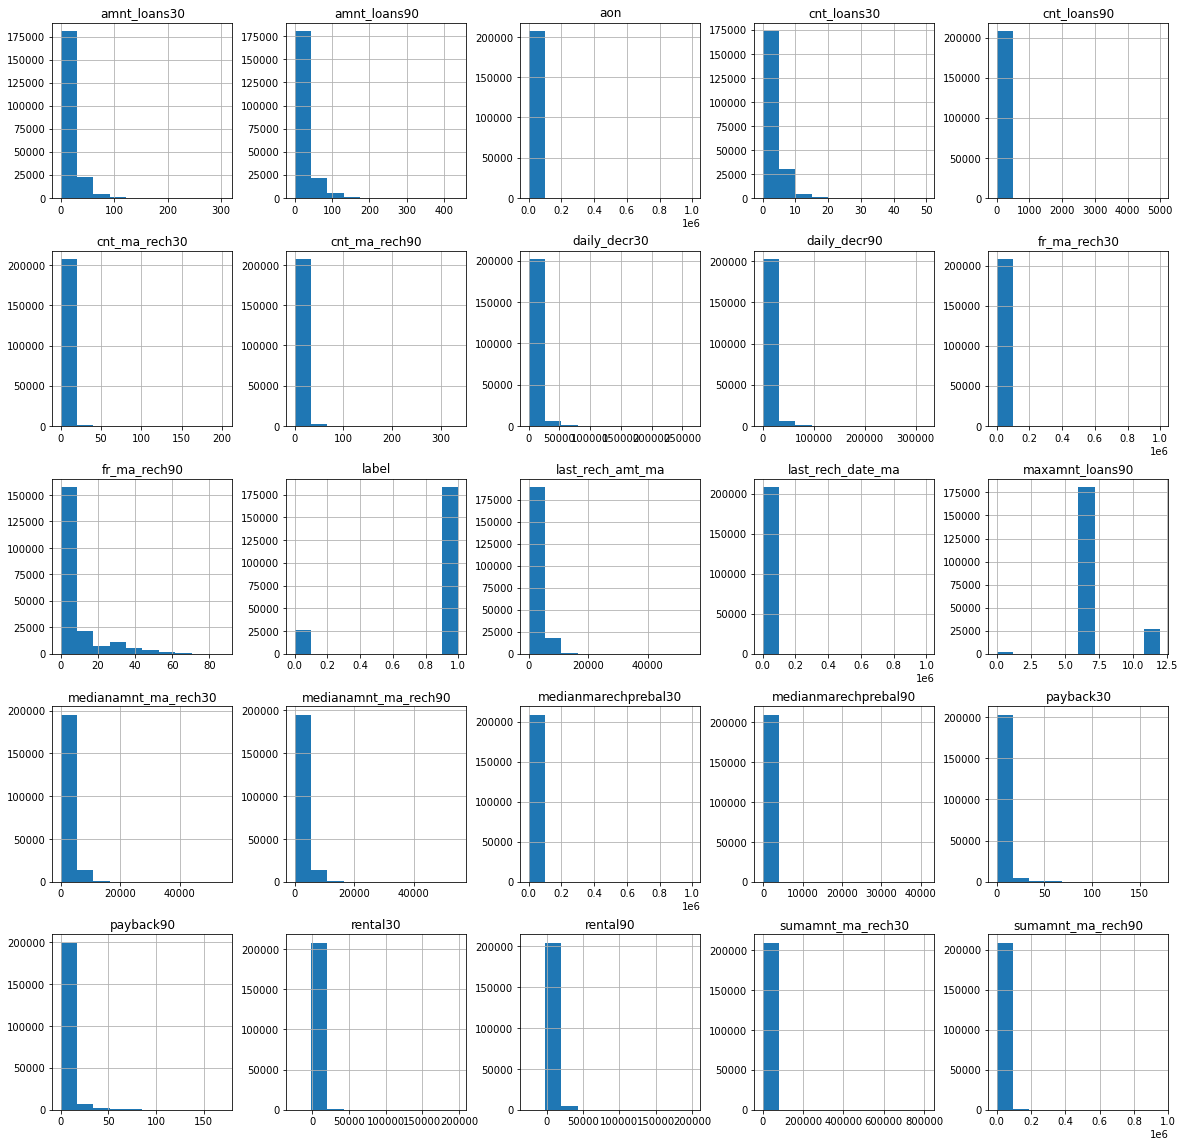

In [39]:
df.hist(figsize=(20,20))
plt.show()

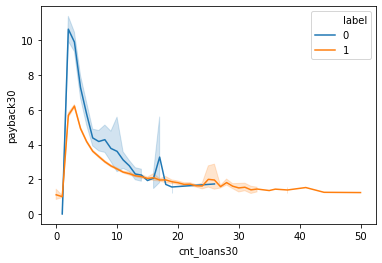

In [40]:
f, ax = plt.subplots(figsize=(6,4))
sns.lineplot(x = 'cnt_loans30', y='payback30', hue='label', data=df)

<b><font color=red>loan amount around 10, there is high no. of Defaulter,but with increasing in loan  amount decrease in Defaulter customers

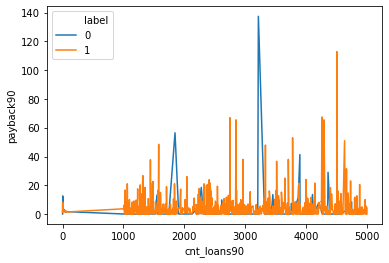

In [41]:
f, ax = plt.subplots(figsize=(6,4))
sns.lineplot(x = 'cnt_loans90', y='payback90', hue='label', data=df)

<b><font color=red>Increasing, in loan amount decrease in Defaulter customers during last 90 days

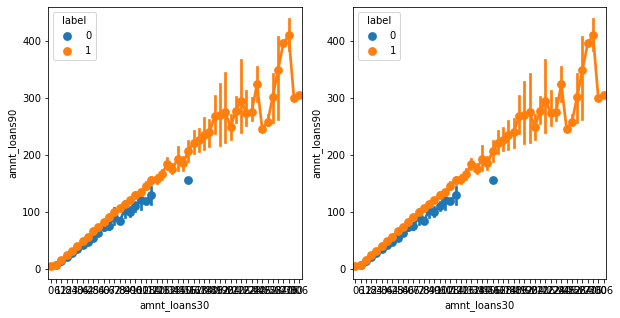

In [42]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='amnt_loans30', y='amnt_loans90', hue='label', data=df, ax=axis1)
sns.pointplot(x='amnt_loans30', y='amnt_loans90', hue='label', data=df, ax=axis2)

<b><font color=red>There is a comparision between loans taken in last 90 & 30 days with respect to label. In both 90 & 30 days yellow color shows the Non Defaulter customers & blue shows the Defaulter customer which are very less

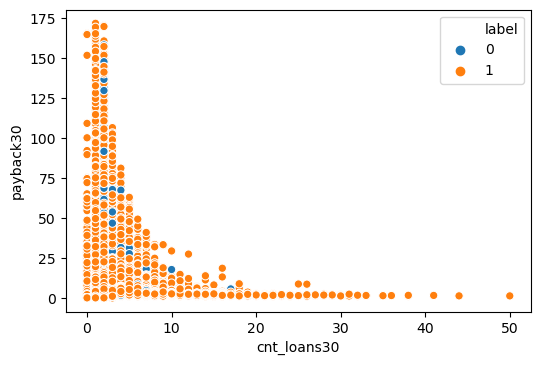

In [43]:
f,ax=plt.subplots(figsize=(6,4),dpi=100)
sns.scatterplot(x=df["cnt_loans30"],y=df["payback30"],hue="label",data=df,cmap="green",linewidths=20)
plt.show()

<b><font color=red>In earlier days of month customer will take more loan and payabck to earlier also, but there is decrement in taking loans or loan repayment with increasing in time 

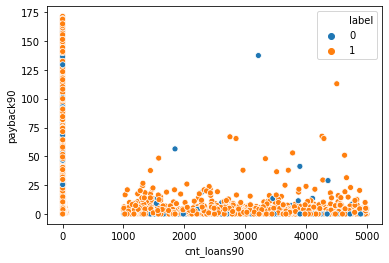

In [44]:
f,ax = plt.subplots(figsize=(6,4))
sns.scatterplot(x=df["cnt_loans90"], y=df["payback90"],hue="label",data=df)

<b><font color=red>In this very high numbers of customers taking loans in last 90 days & repayment of that loan,

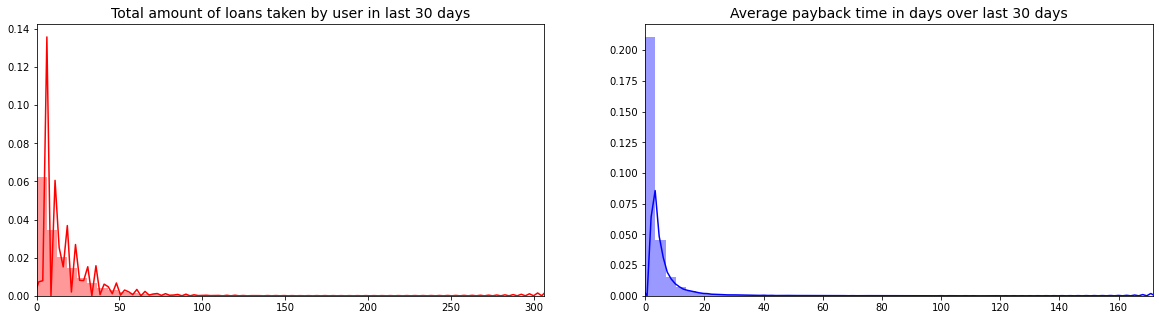

In [45]:
fig,ax = plt.subplots(1,2, figsize=(20,5))

amount_loan=df['amnt_loans30'].values
payback=df['payback30'].values

sns.distplot(amount_loan,ax=ax[0],color='r')
ax[0].set_title('Total amount of loans taken by user in last 30 days', fontsize=14)
ax[0].set_xlim([min(amount_loan),max(amount_loan)])

sns.distplot(payback,ax=ax[1],color='b')
ax[1].set_title('Average payback time in days over last 30 days', fontsize=14)
ax[1].set_xlim([min(payback),max(payback)])

plt.show()

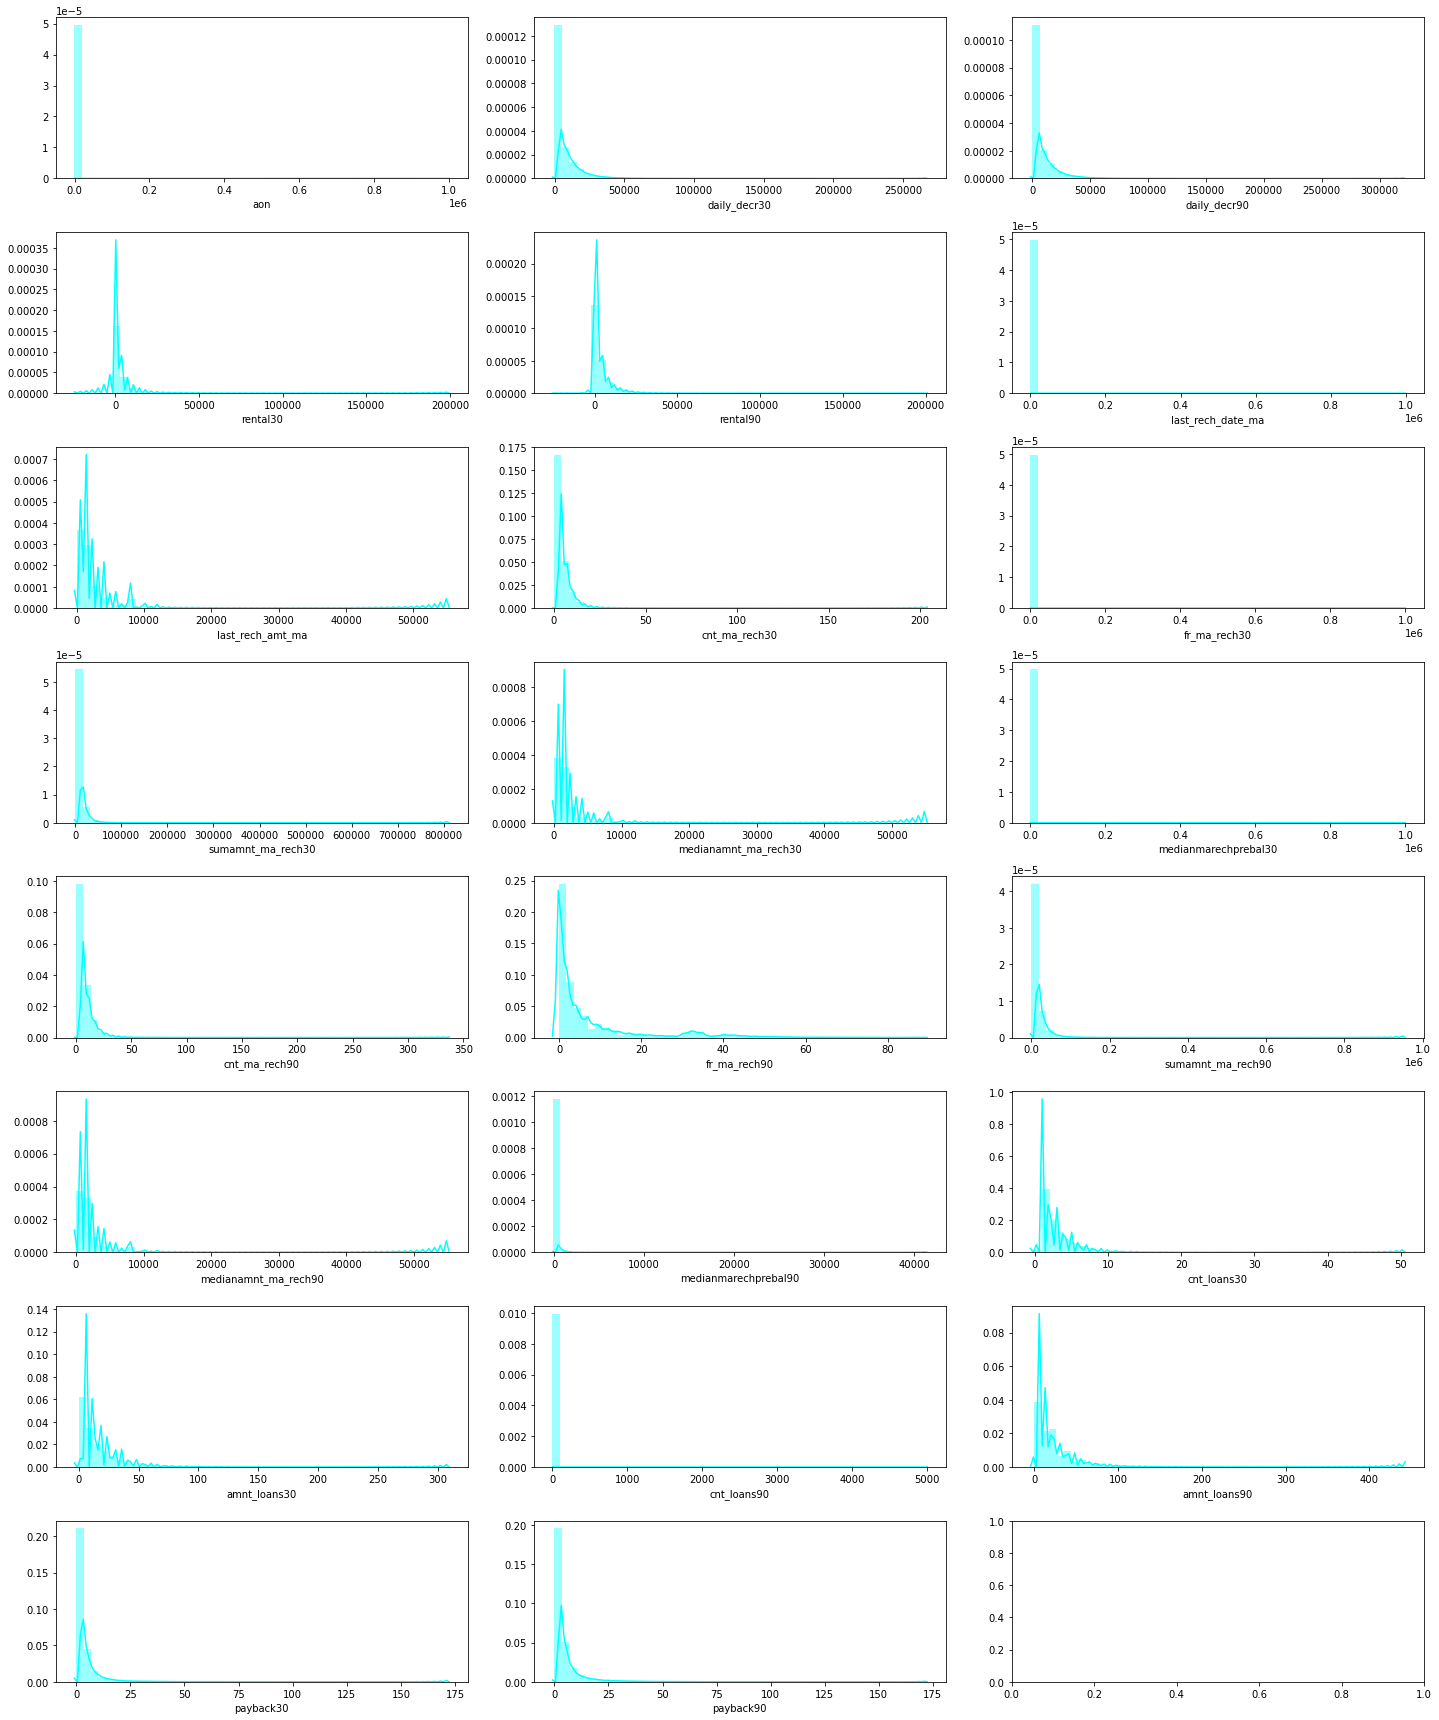

In [46]:
columns = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(20,24))
ax = ax.flatten() 
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i], color="cyan")
plt.tight_layout()
plt.show()

<b><font color=red>Now we will search for Outliers 

##### I'm  doing an experiment with outlier’s imputation technique for the data of the features whose z-score >3. There are many ways to deal with outliers such as imputing outlier’s with mean, median, mode (categorical), k-NN imputation, mice imputation or simply removing and others.
##### For this data set I simply choose mean for imputing the outliers with the respective features. After performing median, I also applied cube root for the data to bring data closer as to make the distribution normal.


<b><font color=red>With the help of Label encoder we will convert all attributes to numerical values

In [47]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
        
    df[column] = LabelEncoder().fit_transform(df[column])

In [48]:
cl = df.columns.values
cl

array(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30',
       'payback90'], dtype=object)

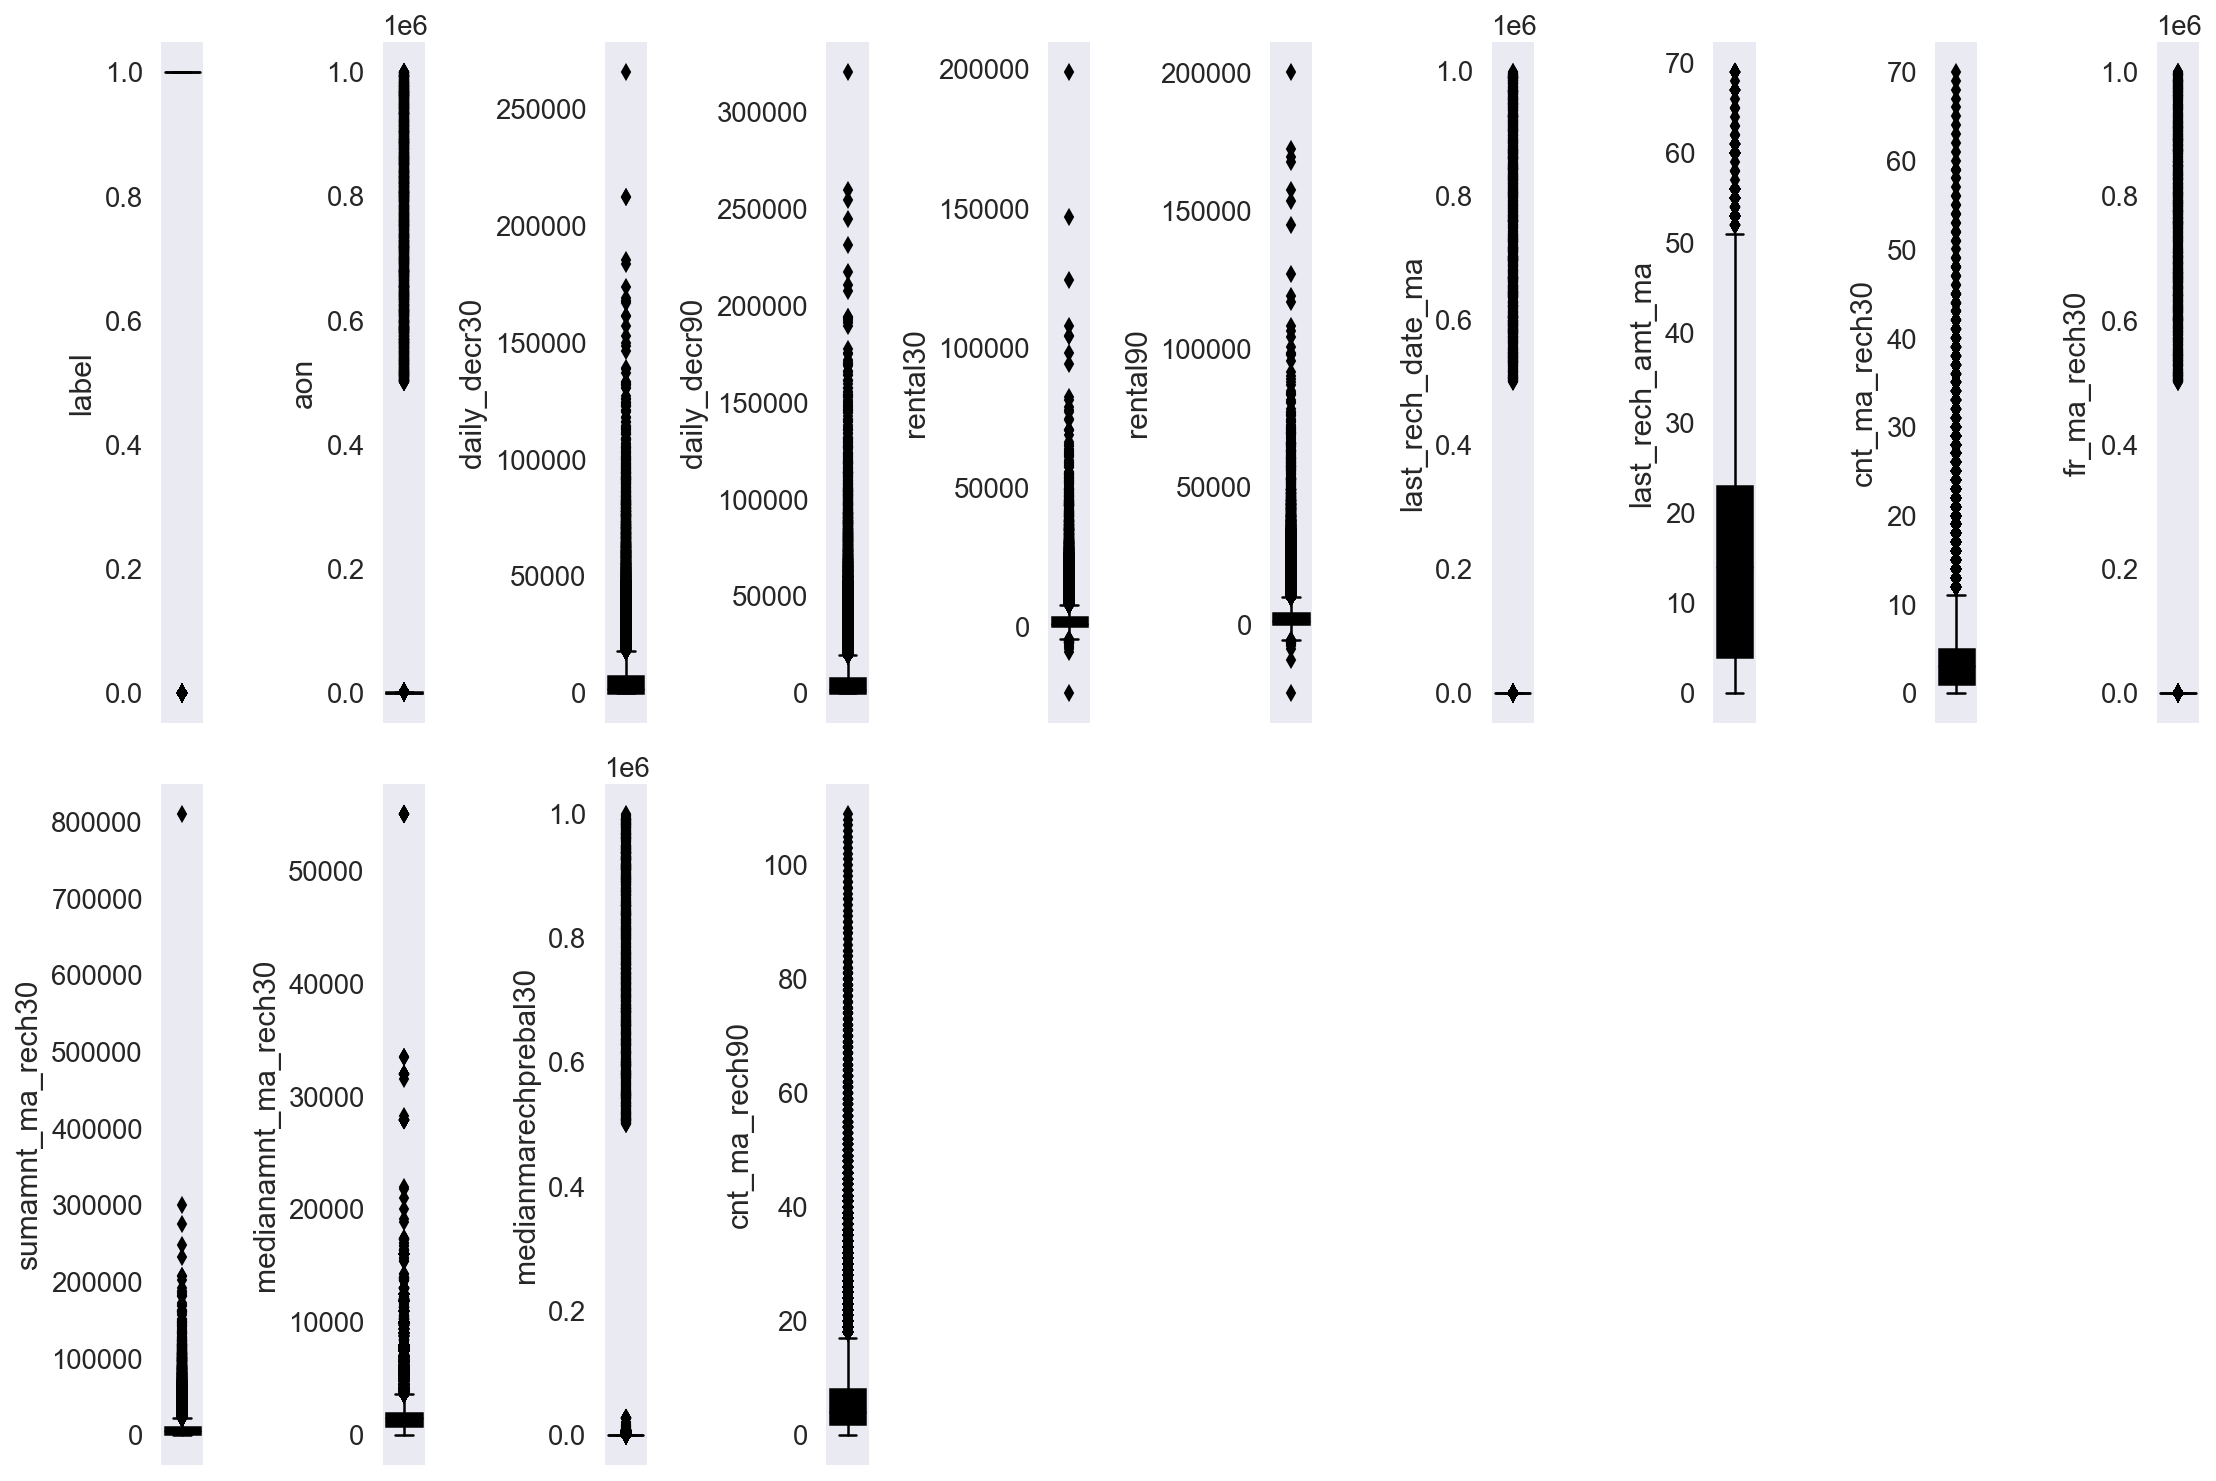

In [49]:
sns.set(style="dark")
sns.set_context("paper",font_scale=1.5)
plt.figure(figsize=(15,20),dpi=150)
for i in range (0,14):
    plt.subplot(4,10,i+1)
    sns.boxplot(df[cl[i]],color="black",orient="v")
plt.tight_layout()

In [50]:
from scipy.stats import zscore
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90',
        'cnt_loans30', 'amnt_loans30','cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>3 or df[columns[i]][j]<-3:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
            df[columns[i]]=np.cbrt((df[columns[i]]))

<b><font color=red>Treating outliers with the help of median, we are using outlier’s imputation technique for the data of the features whose z-score >3 in this data.

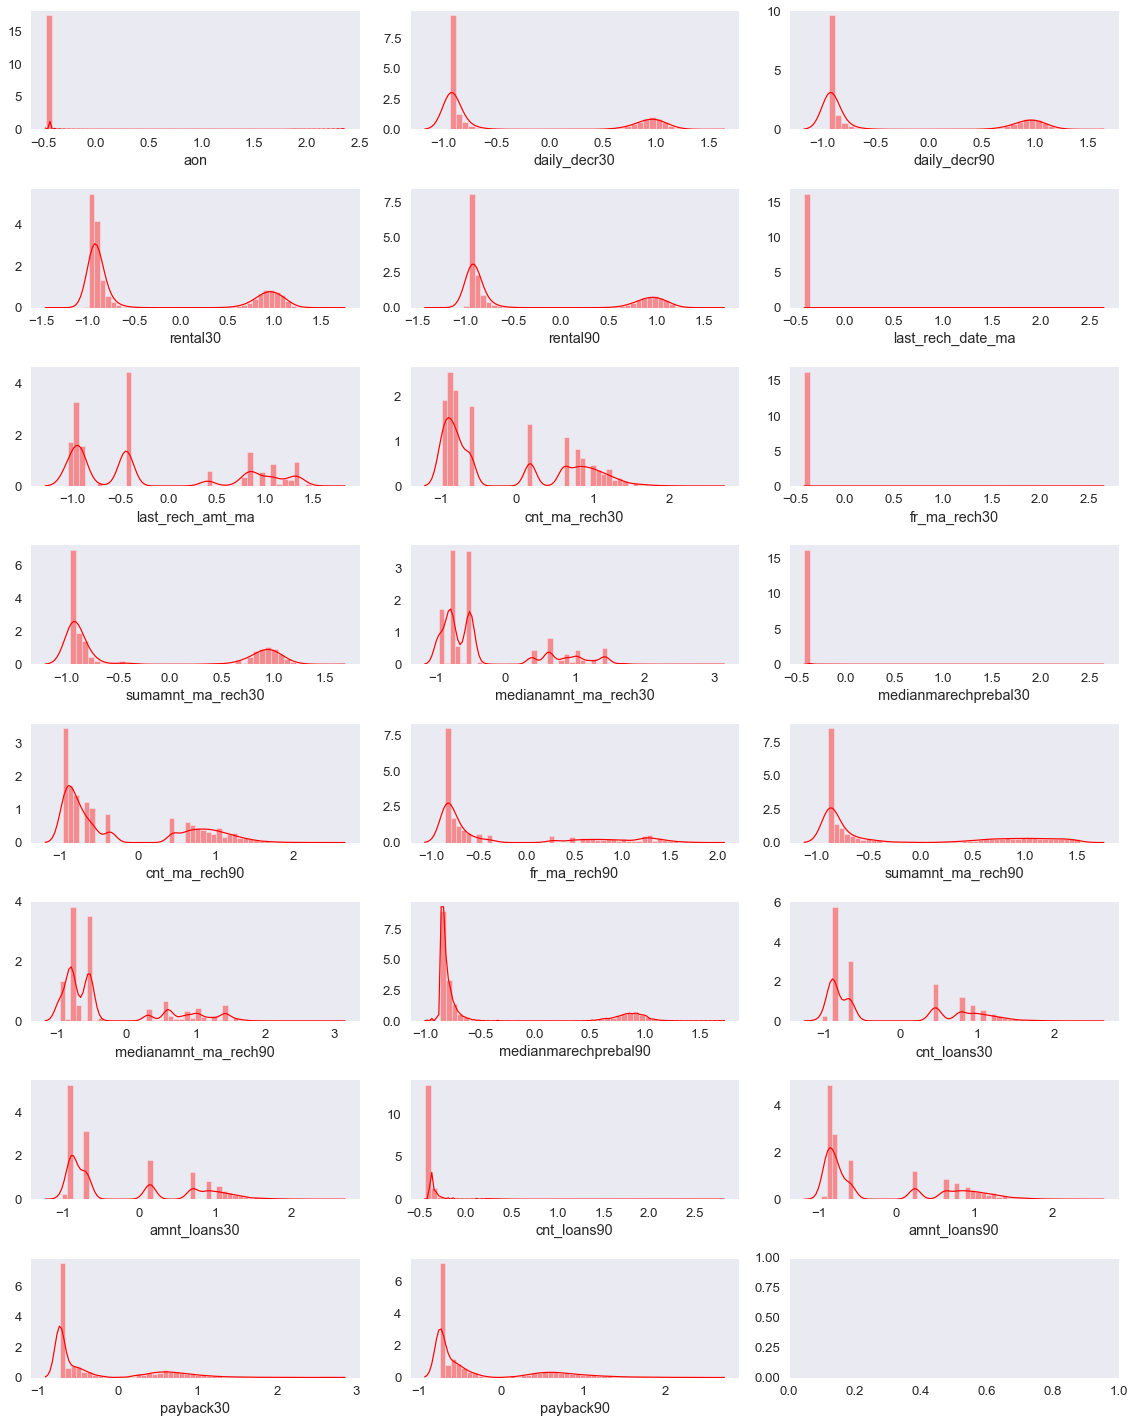

In [51]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

<b><font color=red>Creating independent & Dependent Features

In [52]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["label"]]
# Store the variable we are predicting 
target = "label"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(209593, 24)
(209593,)


<b><font color=red> Defining Defaulter & Non Defaulter 

In [53]:
Defaulter = df[df["label"]==0]
Non_Defaulter = df[df["label"]==1]
print(Defaulter.shape, Non_Defaulter.shape)

(26162, 25) (183431, 25)


### Random Over Sampler

In [54]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler(random_state=42,sampling_strategy="auto")

X_train_res, y_train_res = os.fit_sample(X, Y)

In [55]:
X_train_res.shape,y_train_res.shape

((366862, 24), (366862,))

<b><font color=red>Comparoision the new dataset with Original dataset

In [56]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1: 183431, 0: 26162})
Resampled dataset shape Counter({0: 183431, 1: 183431})


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features'] = df.columns
vif['vif']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif[vif['vif']>4]

Features        vif
0                  label   7.469602
2           daily_decr30  18.260017
3           daily_decr90  19.248713
4               rental30   6.854490
5               rental90   7.553780
6      last_rech_date_ma   4.619107
8          cnt_ma_rech30   5.812997
9           fr_ma_rech30   4.625786
10     sumamnt_ma_rech30   4.444542
11  medianamnt_ma_rech30   4.560020
12  medianmarechprebal30   4.584591
13         cnt_ma_rech90   7.322671
15     sumamnt_ma_rech90   5.610674
16  medianamnt_ma_rech90   5.110175
18           cnt_loans30  17.416625
19          amnt_loans30  20.471461
20           cnt_loans90   4.313921
21          amnt_loans90   6.474960
22       maxamnt_loans90  11.480348

<b><font color=red> The many features are having strong multicollinearity in the data set. This resembles that there is need to go for PCA (Principal Component Analysis).
##### If we won’t perform PCA the noise or correlation between the independent variables will affect the model prediction and model results. More than 50% of the features are having vif >4 so it is mandatory to perform PCA in order to reduce the multicollinearity effect among the independent variables.

<b><font color=red> Standardization of data

In [58]:
from sklearn. preprocessing import StandardScaler
sc = StandardScaler()

# defining x,y
"""dx = df.drop(columns=["label"])
y = df[["label"]]"""

# Scaling x

x = sc.fit_transform(X_train_res)
x = pd.DataFrame(x,columns = X_train_res.columns)
print(x.shape)
print(y.shape)

(366862, 24)
(209593,)


## PCA

In [59]:
from sklearn.decomposition import PCA
c=20
pca = PCA(n_components = c)
x = pca.fit_transform(X)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the Variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_))

Amount of variance: [4.65002905 1.93986335 1.1972741  0.96200926 0.60641598 0.49740982
 0.42737923 0.37394242 0.21247747 0.16518398 0.15324408 0.1086433
 0.09552692 0.08097896 0.07393761 0.06652883 0.06181451 0.05300483
 0.04100173 0.03972658]
Sum of the Variance: 11.81
Percentage of variance: [0.3899412  0.16267267 0.10040077 0.08067198 0.05085271 0.04171169
 0.03583908 0.03135799 0.01781789 0.01385197 0.01285071 0.00911059
 0.00801068 0.00679072 0.00620025 0.00557896 0.00518363 0.00444487
 0.00343832 0.00333138]
Sum of the percentage of variance: 0.9900580498578675


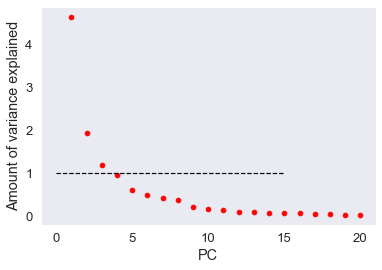

(209593, 20)


In [60]:
plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c="red")
plt.plot((0,15),(1,1),color = "black", linestyle="dashed")
plt.xlabel("PC")
plt.ylabel("Amount of variance explained")
plt.show()
print(x.shape)

<b><font color=red>Spliting dataset

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 24)
(62878, 24)
(146715,)
(62878,)


### Importing Classifiers

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score, roc_curve,roc_auc_score,auc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


<b><font color=red>Appending all models

In [63]:
lr = LogisticRegression()
gnb = GaussianNB()
knc = KNeighborsClassifier()
#svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gdc = GradientBoostingClassifier()
ada = AdaBoostClassifier()


models = []
models.append(("Logistic Regression", lr))
models.append(("GaussianNb",gnb))
models.append(("Kneighbors Classifier",knc))
#models.append(("SVC",svc))              # Taking really long time
models.append(("DecisionTreeClassifier",dtc))
models.append(("Random Forest Classifier",rfc))
models.append(("GradientBoostinClassifier",gdc))
models.append(("AdaBoostClassifier",ada))


### Model

In [64]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import cross_val_score 

Model=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print("==========",name,"==========")
    print("\n")
    Model.append(name)
    model.fit(X_train_res,y_train_res)
    pred=model.predict(X_test)
    print(model)
    print("\n")
    Ac=accuracy_score(y_test,pred)
    print("Accuracy score:",Ac)
    score.append(Ac*100)
    print("\n")
    sc=cross_val_score(model, x, y, cv=10, scoring="accuracy").mean()
    print("Cross val score: ", sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print("Confusion matrix:\n",cm)
    print("\n")
    cr=classification_report(y_test,pred)
    print("Classification Report:", cr)
    print("\n")

========== Logistic Regression ==========


LogisticRegression()


Accuracy score: 0.7124590476796335


Cross val score:  nan


roc_auc_score =  0.7562213276759642


Confusion matrix:
 [[ 6340  1445]
 [16635 38458]]


Classification Report:               precision    recall  f1-score   support

           0       0.28      0.81      0.41      7785
           1       0.96      0.70      0.81     55093

    accuracy                           0.71     62878
   macro avg       0.62      0.76      0.61     62878
weighted avg       0.88      0.71      0.76     62878



========== GaussianNb ==========


GaussianNB()


Accuracy score: 0.6355482044594294


Cross val score:  1.0


roc_auc_score =  0.7303109714605189


Confusion matrix:
 [[ 6666  1119]
 [21797 33296]]


Classification Report:               precision    recall  f1-score   support

           0       0.23      0.86      0.37      7785
           1       0.97      0.60      0.74     55093

    accuracy                           0.6

In [65]:
ovr_all_result= pd.DataFrame({"Model":Model, "Accuracy score":score, "Crosss_val_score":score, "Roc Auc score":rocscore})
ovr_all_result

Model  Accuracy score  Crosss_val_score  Roc Auc score
0        Logistic Regression       71.245905         71.245905      75.622133
1                 GaussianNb       63.554820         63.554820      73.031097
2      Kneighbors Classifier       86.647158         86.647158      92.098890
3     DecisionTreeClassifier       99.957060         99.957060      99.975496
4   Random Forest Classifier       99.879131         99.879131      99.931026
5  GradientBoostinClassifier       79.670155         79.670155      80.628000
6         AdaBoostClassifier       78.178377         78.178377      79.159027

<b><font color=red> Again Building Decision Tree Calssifier model along with heatmap & auc roc map

DecisionTreeClassifier()


Accuracy_score=  0.9995705970291676
Cross_val_score= 1.0 



roc_auc_score=  0.9997549597952553 

classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7785
           1       1.00      1.00      1.00     55093

    accuracy                           1.00     62878
   macro avg       1.00      1.00      1.00     62878
weighted avg       1.00      1.00      1.00     62878
 

Confusion Matrix
 [[ 7785     0]
 [   27 55066]] 

AxesSubplot(0.125,0.808774;0.62x0.0712264)





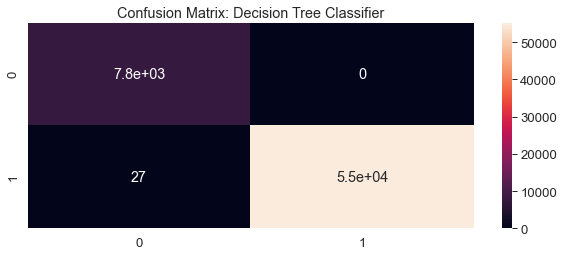

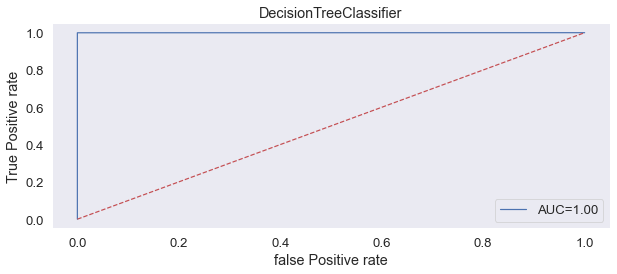

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

DTC=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DTC.fit(X_train_res,y_train_res)
print(DTC)
pred=DTC.predict(X_test)
print('\n')
AS=accuracy_score(y_test,pred)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DTC,X,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cvs.append(sc*100)
print('\n')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score= ',roc_auc,'\n')
rocscore.append(roc_auc*100)
print('classification_report\n',classification_report(y_test,pred),'\n')
cm=confusion_matrix(y_test,pred)
print('Confusion Matrix\n',cm,'\n')

cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix: Decision Tree Classifier")
print(sns.heatmap(cm,annot=True))

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('DecisionTreeClassifier')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive rate')
plt.xlabel('false Positive rate')
print('\n\n')

In [67]:
print("Actual Patient addmited to ward:\n",y_test)
print("Predicted Patient addmited to ward:\n",pred)

Actual Patient addmited to ward:
 195331    1
61584     1
103931    1
113088    1
95108     1
         ..
205798    0
8929      1
181107    1
193680    1
9762      1
Name: label, Length: 62878, dtype: int64
Predicted Patient addmited to ward:
 [1 1 1 ... 1 1 1]


## Saving the Model
##### we will save DTC model with almost 100% accuracy, using jjoblib to save the model

In [68]:
import joblib
joblib.dump(DTC,"DTC_Micro_Credit_Defaulter")

['DTC_Micro_Credit_Defaulter']

## Conclusion
#####  We use RandomOver Sampler & Outlier imputation with median as result we get almost 100% accuracy in 2 models named are as follows
##### 1) Decision Tree Classifier
##### 2) Random Forest Classifier
#### But we take Decision tree Classifier because its cross val score & roc auc score is also almost 100%, or more accurate than Random Forest Model